In [ ]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,005 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,347 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,270 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadco

In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import numpy as np
import requests
import time
import pandas as pd
from html.parser import HTMLParser
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

# set the target URL
url = "put-url-here-to-scrape"

# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [ ]:
def getVotes(id):
    driver.get(f'https://wybory.gov.pl/sejmsenat2023/pl/sejm/wynik/okr/{id}')

    # clicking a button to disable cookies, run once per session
    #try:
    #driver.find_element(By.CSS_SELECTOR, "div.actual:nth-child(2) > div:nth-child(1) > button:nth-child(2)").click()
    #except:
        #print('Clicking failed')

    # waiting if we can find the element
    try:
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.ID, "DataTables_Table_0")))
    except:
        print("Results are either not yet on the page or Selenium took too long to find the element")

    #alerts = driver.find_element(By.ID, 'alerts')
    #alert

    results_table = driver.find_element(By.ID, "DataTables_Table_0")

    soup = BeautifulSoup(results_table.get_attribute('innerHTML'), 'html.parser')
    # Find all table rows within the tbody
    table_rows = soup.select('tbody tr')

    results = {}
    votes = {}

    # Extract data from each row
    for row in table_rows:
        committee = row.find('a').text
        voteCount = int(row.find('td', class_='sorting_1').find('div').text)  # Corrected line
        #pollingStationsString = soup.se('div', class_='alert alert-info').text
        #print(pollingStationsString)
        #checkedPollingStations
        votes[committee] = voteCount

    results['votes'] = votes
    return votes


In [ ]:
#t = getVotes(19)
#t
# driver.get(f'https://wybory.gov.pl/sejmsenat2023/pl/sejm/wynik/okr/19')
# WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME, "alert-info")))
# alerts = driver.find_element(By.CLASS_NAME, 'alert-info')
# s = BeautifulSoup(alerts.get_attribute('innerHTML'), 'html.parser')
#a = s.find('div', class_='alert alert-info')
#a
a = alerts.get_attribute('innerHTML')
a.replace('&nbsp;', '')
nums = [int(s) for s in a.split() if s.isdigit()]
nums


[]

In [ ]:
def dhont(nSeats,votes,verbose=False):
    """
    nSeats is the number of seats
    votes is a dictionary with the key:value {'party':votes}
    verbose is an option to print designation info
    """
    t_votes=votes.copy()
    seats={}
    for key in votes: seats[key]=0
    while sum(seats.values()) < nSeats:
        max_v= max(t_votes.values())
        next_seat=list(t_votes.keys())[list(t_votes.values()).index(max_v)]
        if next_seat in seats:
            seats[next_seat]+=1
        else:
            seats[next_seat]=1

        if verbose:
            print("{} Escaño: {}".format(sum(seats.values()),next_seat))
            for key in t_votes:
                print("\t{} [{}]: {:.1f}".format(key,seats[key],t_votes[key]))
            print("\b")
        t_votes[next_seat]=votes[next_seat]/(seats[next_seat]+1)
    return seats

In [ ]:
districts = {
    1: {'district': 1, 'name': 'Jelenia Góra, Legnica', 'seats': 12},
    2: {'district': 2, 'name': 'Wałbrzych', 'seats': 8},
    3: {'district': 3, 'name': 'Wrocław', 'seats': 14},
    4: {'district': 4, 'name': 'Bydgoszcz', 'seats': 12},
    5: {'district': 5, 'name': 'Toruń, Włocławek', 'seats': 13},
    6: {'district': 6, 'name': 'Lublin', 'seats': 15},
    7: {'district': 7, 'name': 'Biała Podlaska, Chełm, Zamość', 'seats': 12},
    8: {'district': 8, 'name': 'Lubuskie', 'seats': 12},
    9: {'district': 9, 'name': 'Łódź', 'seats': 10},
    10: {'district': 10, 'name': 'Piotrków Trybunalski, Skierniewice', 'seats': 9},
    11: {'district': 11, 'name': 'Łódzkie powiaty', 'seats': 12},
    12: {'district': 12, 'name': 'Małopolskie powiaty', 'seats': 8},
    13: {'district': 13, 'name': 'Kraków', 'seats': 14},
    14: {'district': 14, 'name': 'Nowy Sącz', 'seats': 10},
    15: {'district': 15, 'name': 'Tarnów', 'seats': 9},
    16: {'district': 16, 'name': 'Płock', 'seats': 10},
    17: {'district': 17, 'name': 'Radom', 'seats': 9},
    18: {'district': 18, 'name': 'Ostrołęka, Siedlce', 'seats': 12},
    19: {'district': 19, 'name': 'Warszawa, zagranica', 'seats': 20},
    20: {'district': 20, 'name': 'Mazowieckie powiaty', 'seats': 12},
    21: {'district': 21, 'name': 'Opolskie', 'seats': 12},
    22: {'district': 22, 'name': 'Krosno, Przemyśl', 'seats': 11},
    23: {'district': 23, 'name': 'Rzeszów, Tarnobrzeg', 'seats': 15},
    24: {'district': 24, 'name': 'Podlaskie', 'seats': 14},
    25: {'district': 25, 'name': 'Gdańsk, Sopot', 'seats': 12},
    26: {'district': 26, 'name': 'Gdynia, Słupsk', 'seats': 14},
    27: {'district': 27, 'name': 'Bielsko-Biała', 'seats': 9},
    28: {'district': 28, 'name': 'Częstochowa', 'seats': 7},
    29: {'district': 29, 'name': 'Bytom, Gliwice, Zabrze', 'seats': 9},
    30: {'district': 30, 'name': 'Jastrzębie-Zdrój, Rybnik, Żory', 'seats': 9},
    31: {'district': 31, 'name': 'Katowice', 'seats': 12},
    32: {'district': 32, 'name': 'Sosnowiec', 'seats': 9},
    33: {'district': 33, 'name': 'Świętokrzyskie', 'seats': 16},
    34: {'district': 34, 'name': 'Elbląg', 'seats': 8},
    35: {'district': 35, 'name': 'Olsztyn', 'seats': 10},
    36: {'district': 36, 'name': 'Kalisz, Leszno', 'seats': 12},
    37: {'district': 37, 'name': 'Konin', 'seats': 9},
    38: {'district': 38, 'name': 'Wielkopolskie powiaty', 'seats': 9},
    39: {'district': 39, 'name': 'Poznań', 'seats': 10},
    40: {'district': 40, 'name': 'Koszalin', 'seats': 8},
    41: {'district': 41, 'name': 'Szczecin', 'seats': 12},
}

In [ ]:
df = pd.DataFrame.from_dict(districts).transpose()
df

,district,name,seats
1,1,"Jelenia Góra, Legnica",12
2,2,Wałbrzych,8
3,3,Wrocław,14
4,4,Bydgoszcz,12
5,5,"Toruń, Włocławek",13
6,6,Lublin,15
7,7,"Biała Podlaska, Chełm, Zamość",12
8,8,Lubuskie,12
9,9,Łódź,10
10,10,"Piotrków Trybunalski, Skierniewice",9


In [ ]:
np.sum(df.seats)

460

In [ ]:
committeeMapping = {
    'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI': 'KO',
    'KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE': 'TD',
    'KOMITET WYBORCZY NOWA LEWICA':	'LEWICA',
    'KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ': 'Konfa',
    'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ': 'PiS',
}

#populate the table with a loop inside a function
districtRange = range(1,42)

votingData = {}
for id in districtRange:
    print(id)
    votingData[id] = getVotes(id)

convertedData = {}
for districtId in districtRange:
    newEntry = {}
    for key in committeeMapping:
        shorthand = committeeMapping[key]
        newEntry[shorthand] = votingData[districtId][key]
    convertedData[districtId] = newEntry

print(convertedData)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
{1: {'KO': 169540, 'TD': 53958, 'LEWICA': 47715, 'Konfa': 31770, 'PiS': 174643}, 2: {'KO': 120188, 'TD': 39215, 'LEWICA': 25806, 'Konfa': 19478, 'PiS': 107797}, 3: {'KO': 286713, 'TD': 106624, 'LEWICA': 88089, 'Konfa': 54132, 'PiS': 206899}, 4: {'KO': 186914, 'TD': 80426, 'LEWICA': 52959, 'Konfa': 34266, 'PiS': 162603}, 5: {'KO': 158719, 'TD': 84308, 'LEWICA': 60473, 'Konfa': 34232, 'PiS': 183131}, 6: {'KO': 131712, 'TD': 102894, 'LEWICA': 37083, 'Konfa': 54325, 'PiS': 294847}, 7: {'KO': 79501, 'TD': 59577, 'LEWICA': 25691, 'Konfa': 35594, 'PiS': 231882}, 8: {'KO': 195091, 'TD': 77933, 'LEWICA': 47911, 'Konfa': 33672, 'PiS': 143530}, 9: {'KO': 187527, 'TD': 54283, 'LEWICA': 55770, 'Konfa': 25428, 'PiS': 122433}, 10: {'KO': 86083, 'TD': 54479, 'LEWICA': 25340, 'Konfa': 30247, 'PiS': 184929}, 11: {'KO': 138038, 'TD': 77313, 'LEWICA': 41188, 'Konfa': 36383, 'PiS': 221031}, 12:

In [ ]:
seatResults = {}
for key in convertedData:
    seatResults[key] = dhont(districts[key]['seats'], convertedData[key])

seats = pd.DataFrame(seatResults).transpose()
summedSeats = seats.sum()
summedSeats

KO        157
TD         65
LEWICA     26
Konfa      18
PiS       194
dtype: int64

In [ ]:
seats

,KO,TD,LEWICA,Konfa,PiS
1,5,1,1,0,5
2,4,1,0,0,3
3,6,2,1,1,4
4,5,2,1,0,4
5,4,2,1,1,5
6,3,2,1,1,8
7,2,2,0,1,7
8,5,2,1,0,4
9,5,1,1,0,3
10,2,1,0,0,6


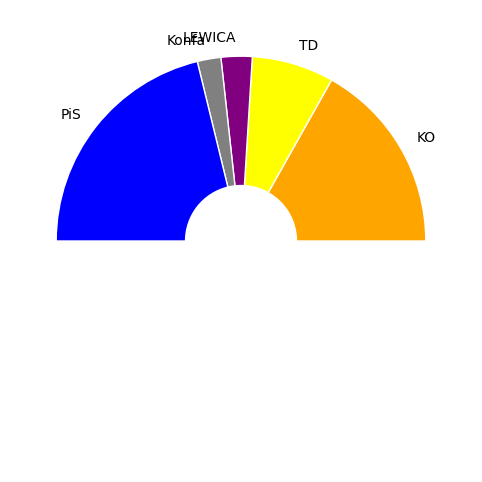

In [ ]:
# data
import matplotlib.pyplot as plt
import copy
# data = {
#     'KO': int(summedSeats['KO']),
#     'TD': int(summedSeats['TD']),
#     'LEWICA': int(summedSeats['LEWICA'],
#     'Konfa': int(summedSeats['Konfa'],
#     'PiS': int(summedSeats['PiS'],
#     'empty': int(summedSeats.sum()), # 50% blank
# }

data = copy.copy(summedSeats)
data[' '] = summedSeats.sum()

colors = ['orange', 'yellow', 'purple', 'gray', 'blue', 'k']

# plot
plt.figure(figsize=(8,6),dpi=100)

wedges, labels=plt.pie(data, wedgeprops=dict(width=0.7,edgecolor='w'), labels=['KO', 'TD', 'LEWICA', 'Konfa', 'PiS', ' '], colors=colors)

# I tried this method
wedges[-1].set_visible(False)
plt.show()

In [ ]:
total = 460
opposition = int(summedSeats['KO'])+int(summedSeats['TD'])+int(summedSeats['LEWICA'])
print(f'Koalicja: ' + str(opposition) + '/460')
print(f'PiS: ' + str(summedSeats['PiS']))
print(f'Konfa: ' + str(summedSeats['Konfa']))